# Úkol č. 1 - předzpracování dat a binární klasifikace

  * **Deadline je do 3. 11. 2022, 23:59:59**, pokud odevzdáte úkol do 10. 11. 2022, 23:59:59, budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s příznaky, které jsou různých typů.
  * Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru **data.csv** a data na vyhodnocení v souboru **evaluation.csv**.

#### Seznam příznaků:
* survived - zda přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
  * Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.
  * V notebooku načtěte data ze souboru **data.csv**. Vhodným způsobem si je rozdělte na podmnožiny potřebné k trénování a evaluaci modelu (optimálně tedy trénovací, validační a testovací).
  * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
  * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména. Některé příznaky můžete také úplně zahodit. Pro průzkum dat využívejte vizualizace.
  * Nějakým způsobem se vypořádejte s chybějícími hodnotami.
  * Následně si vyberte vhodný klasifikační model z přednášek. Najděte vhodné hyperparametry a určete jeho přesnost (accuracy) na trénovací množině. Také určete jeho přesnost na testovací množině.
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
  * Ukázka prvních řádků souboru *results.csv*:
  
```
ID,survived
1000,0
1001,1
...
```

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte na testovací množině. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zaměřte se na optimální předzpracování dat. Zabývejte se tím, jak nejlépe zpracovat a reprezentovat kategoriální příznaky. Také zkuste data normalizovat. Zaměřte se na vliv těchto kroků na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
  * Vytvořte i csv soubor s predikcemi a uložte ho v rámci projektu (`results.csv`, vedle ipython notebooku).
  * Opravující Vám ve výjimečných případech může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale stěžejní a má hlavní vliv na hodnocení.

**Potrebné importy**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Načítanie dát**
Načítanie trénovacích a testovacích dát z csv súboru do pandas typu DataFrame

In [2]:
train_data = pd.read_csv('data.csv')
eval_data = pd.read_csv('evaluation.csv')

full_data = [train_data, eval_data]

In [3]:
train_data.head(10)

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,NaN
1,1,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S,"Australia Fingal, ND"
2,2,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,Belfast
3,3,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
4,4,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,"New York, NY"
5,5,0,3,"Torfa, Mr. Assad",male,NaN,0,0,2673,7.2292,NaN,C,NaN
6,6,0,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,"New York, NY"
7,7,1,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S,"Greenport, NY"
8,8,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,"New York, NY"
9,9,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S,"Norwich / New York, NY"


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        797 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      222 non-null    object 
 11  embarked   999 non-null    object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [5]:
train_data.describe()

,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.000000,1000.000000,797.000000,1000.000000,1000.000000,999.000000
mean,499.500000,0.391000,2.293000,30.006692,0.499000,0.384000,33.418514
std,288.819436,0.488219,0.840153,14.240416,1.020314,0.873675,53.115334
min,0.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,249.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,499.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,749.250000,1.000000,3.000000,38.500000,1.000000,0.000000,31.275000
max,999.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Úprava veku pasažierov**
Doplníme chýbajúce dáta mediánom veku
Rozdelíme pasažierov do štyroch vekových skupín

In [6]:
for dataset in full_data:
    dataset['age'].fillna(dataset['age'].median(), inplace = True)

for dataset in full_data:    
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[ dataset['age'] > 64, 'age'] = 4


**Úprava cestovného**
Chýbajúce dáta doplníme mediánom cestovného
Pretypujeme cestovné na celé čísla

In [7]:
for dataset in full_data:
    dataset['fare'].fillna(dataset['fare'].median(), inplace = True)

for dataset in full_data:
    dataset['fare'] = dataset['fare'].astype(int)

**Úprava stĺpcu 'embarked'**
Chýbajúce dáta doplníme najčastejšou hodnotou v stĺpci
Hodnoty v stĺpci namapujeme na celé čisla 0, 1, 2

In [8]:
for dataset in full_data:
    dataset['embarked'].fillna(dataset['embarked'].dropna().mode()[0], inplace = True)

for dataset in full_data:
    dataset['embarked'] = dataset['embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

**Vytvorenie stĺpcu 'title'**
Zo stĺpca s menami vyberieme titul pred menom, a vytvoríme nový stĺpec s názvom 'title', do ktorého tieto hodnoty umiestnime
Tituly s nízkym výskytom (pod 20) nahradíme slovom 'other'
Tituly namapujeme na celé čísla 0 až 4

In [9]:
for dataset in full_data:
    dataset['title'] = dataset['name'].apply(lambda x : x[x.index(',') + 2 : x.index('.')])

for dataset in full_data:
    other_titles = dataset['title'].value_counts() < 20
    dataset['title'] = dataset['title'].apply(lambda x : 'other' if other_titles.loc[x] else x)

for dataset in full_data:
    dataset['title'] = dataset['title'].map({'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'other' : 4})

**Pohlavie**
V stĺpci s pohlavím nahradíme pohlavia za celočíselné hodnoty 0 a 1

In [10]:
for dataset in full_data:
    dataset['sex'] = dataset['sex'].map( {'female': 0, 'male': 1} ).astype(int)

**Veľkosť rodiny**
Vytvoríme nový stĺpec 'family size', do ktorého uložíme súčet stĺpcov 'sibsp' a 'parch', a pridáme 1 za danú osobu 

In [11]:
for data in full_data:
    data['family size'] = data['sibsp'] + data['parch'] + 1

**Dropneme nepotrebné stĺpce**
Stĺpce 'cabin' a 'ticket' majú príliš veľké množstvo chýbajúcich hodnôt
Stĺpec 'ID' pozostáva z umelo vytvorených dát, a nijako nekoreluje s pravdepodobnosťou prežitia osoby
Stĺpec 'home.dest' má príliš veľa unikátnych hodnôt, ktoré sa nedajú dobre kategorizovať
Stĺpec 'name' sme využili na vytvorenie stĺpca 'title' a ďalej nijako nemení výsledok

In [12]:
for dataset in full_data:
    dataset.drop(['cabin', 'ticket', 'home.dest', 'name'], axis = 1, inplace = True)

**Ukážka dát po vyčistení a doplnení**

In [13]:
train_data.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,family size
0,0,1,3,1,1.0,0,0,7,0,0,1
1,1,1,3,1,2.0,0,0,8,0,0,1
2,2,0,2,1,1.0,0,0,0,0,0,1
3,3,1,3,0,1.0,0,2,11,0,1,3
4,4,0,1,1,1.0,1,0,82,1,0,2


**Rozdelenie dát na náhodné trénovacie a testovacie podmožiny**

In [14]:
Xdata = train_data.drop("survived", axis = 1)
ydata = train_data.survived

Xtrain, Xeval, ytrain, yeval = train_test_split(Xdata, ydata, test_size = 0.25, random_state=333)

**Hľadanie ideálnej hĺbky rozhodovacieho stromu**
For cyklom prejdeme hĺbky od 1 po 100 a vyberieme hĺbku, pri ktorej sme dosiahli najvačšiu presnosť

In [15]:
eval_acc = []
train_acc = []
depths = range(1,100)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(Xtrain, ytrain)
    eval_acc.append(metrics.accuracy_score(yeval, clf.predict(Xeval)))
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))

depth = np.argmax(eval_acc) + 1

**Rozhodovací strom**
Dáta vložíme do stromu s optimálnou hĺbkou a skontrolujeme presnosť modelu

In [16]:
clfTree = DecisionTreeClassifier(max_depth = depth)
clfTree.fit(Xtrain, ytrain)
metrics.accuracy_score(yeval, clfTree.predict(Xeval))

0.768

**Graf ladenia hĺbky rozhodovacieho stromu**

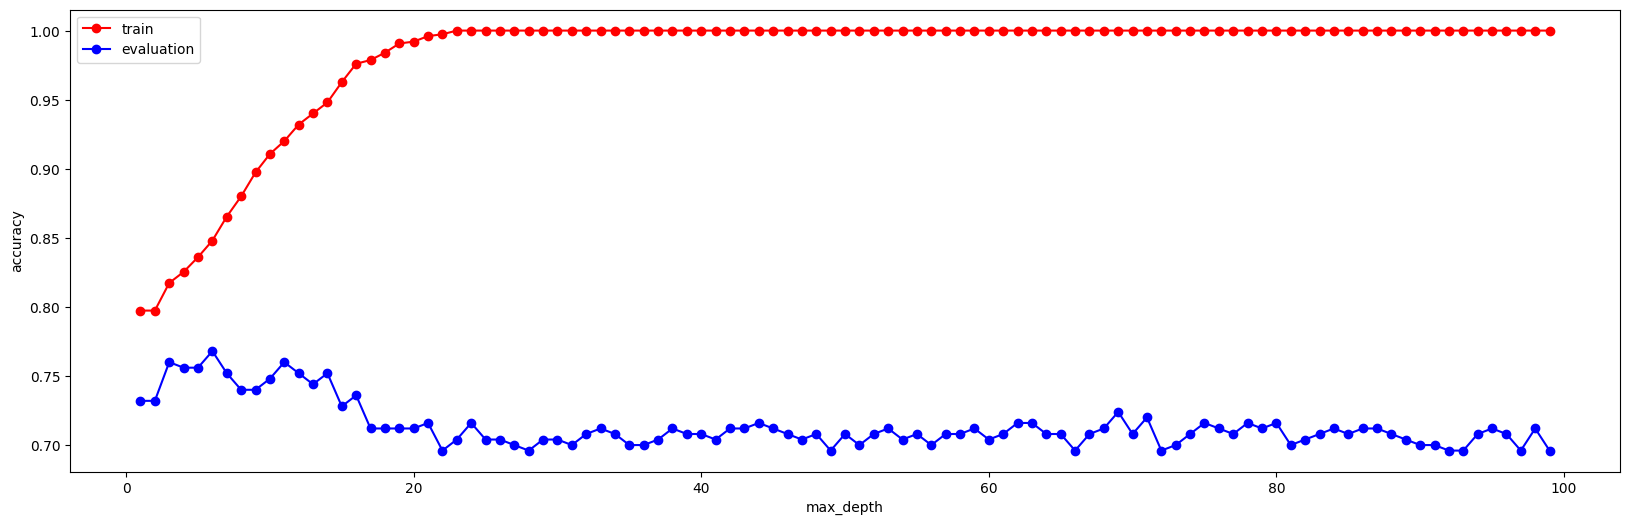

In [17]:
plt.figure(figsize=(20,6))
plt.plot(depths, train_acc,'or-')
plt.plot(depths, eval_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'evaluation'])

**KNeighboursRegressor ideálny počet susedov**

In [18]:
eval_acc = []
train_acc = []
neighbors = range(1, 10)
for neighbor in neighbors:
    clf = KNeighborsClassifier(n_neighbors=neighbor)
    clf.fit(Xtrain, ytrain)
    eval_acc.append(metrics.accuracy_score(yeval, clf.predict(Xeval)))
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))

ideal_neighbors = np.argmax(eval_acc) + 1

**KNeighboursRegressor**
Do modelu napasujeme dáta a ideálny počet susedov, a vypíšeme presnosť modelu

In [19]:
clf = KNeighborsClassifier(n_neighbors = ideal_neighbors)
clf.fit(Xtrain, ytrain)
metrics.accuracy_score(yeval, clf.predict(Xeval))

0.624

**Logistická regresia**
Napasovanie dát do logistickej regresie a výpis presnosti modelu

In [20]:
clf = LogisticRegression(max_iter=1000)
clf.fit(Xtrain,ytrain)

print(metrics.accuracy_score(yeval, clf.predict(Xeval)))

0.744


**Najlepšej presnosti sme dosiahli pri využití rozhodovacieho stromu.**

In [23]:
ypredicted = clfTree.predict(eval_data)
results = pd.DataFrame({'IDS': eval_data['ID'], 'survived': ypredicted})
results.to_csv('results.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d87fd51c-1038-4bff-a4e2-b3491c92505b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>